This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime

### Apresentation do Notebook 

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Carregando os dados

In [3]:
df_data = pd.read_csv('mission_launches.csv')

# Exploração do dataframe e limpeza de dados


In [4]:
df_data.shape

(4324, 9)

In [5]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [6]:
df_data.isna().values.sum()

3360

In [7]:
df_data.duplicated().values.sum()

0

# Removendo colunas indesejadas 


In [8]:
df_data.drop(columns=["Unnamed: 0.1","Unnamed: 0"],axis=1, inplace=True)
df_data

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive    NaN   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired    NaN   
4320                           Juno I | Explorer 1  StatusRetired    NaN   
4321                       Vanguard | Vanguard TV3  StatusRetired    NaN   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired    NaN   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired    NaN   

     Mission_Status  
0           Success  
1           Success  
2           Success  
3           Success  
4           Success  
...             ...  
4319        Failure  
4320        Success  
4321        Failure  
4322        Success  
4323        Success  

[4324 rows x 7 columns]

## Estatísticas descritivas e Transformação de dados


In [9]:
df_data.describe()

Organisation                                    Location  \
count          4324                                        4324   
unique           56                                         137   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq           1777                                         235   

                              Date                               Detail  \
count                         4324                                 4324   
unique                        4319                                 4278   
top     Wed Nov 05, 2008 00:15 UTC  Cosmos-3MRB (65MRB) | BOR-5 Shuttle   
freq                             2                                    6   

        Rocket_Status  Price Mission_Status  
count            4324    964           4324  
unique              2     56              4  
top     StatusRetired  450.0        Success  
freq             3534    136           3879

In [10]:
print(type(df_data.Price[0]))
print(type(df_data.Date[0]))

<class 'str'>
<class 'str'>


In [11]:
df_data["Date"] = pd.to_datetime(df_data["Date"],utc=True)

In [12]:
df_data.Price = df_data.Price.str.replace(",","")
df_data.Price = pd.to_numeric(df_data.Price)

# Organizações no top 10 e a quantidade de lançamentos



In [13]:
orgs = df_data.groupby(["Organisation"],as_index=False).agg({"Mission_Status": pd.Series.count})
orgs.sort_values("Mission_Status", inplace=True,ascending=False)

top_10_orgs = orgs[:10]
top_10_orgs

Organisation  Mission_Status
40         RVSN USSR            1777
3        Arianespace             279
17  General Dynamics             251
7               CASC             251
35              NASA             203
52            VKS RF             201
49      US Air Force             161
48               ULA             140
6             Boeing             136
34   Martin Marietta             114

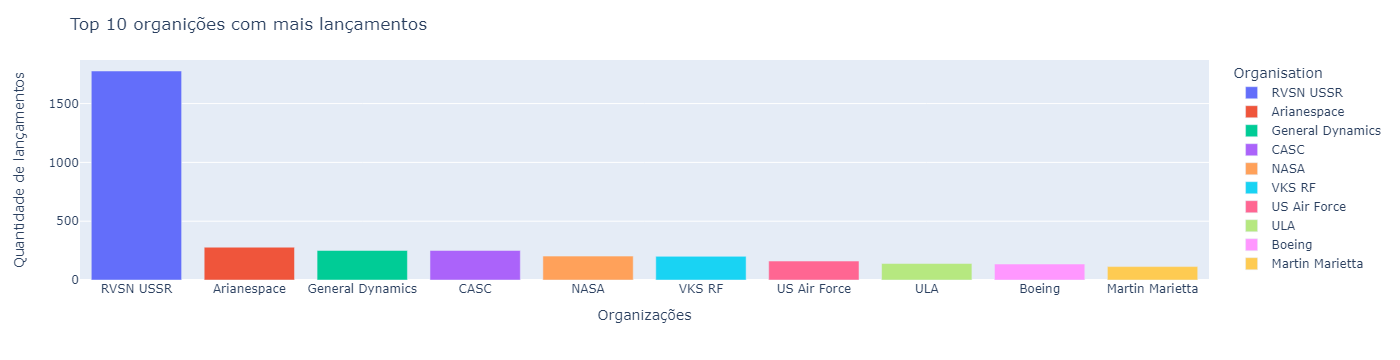

<Figure size 1400x800 with 0 Axes>

In [14]:
plt.figure(figsize=(14,8))
bar = px.bar(top_10_orgs, x="Organisation", y="Mission_Status",color="Organisation")
bar.update_layout(title="Top 10 organições com mais lançamentos", yaxis_title="Quantidade de lançamentos",xaxis_title="Organizações")
bar.show()

# As 10 orgs que mais investiram em lançamentos espaciais

In [15]:
orgs_prices = df_data.groupby("Organisation", as_index=False).agg({"Price": pd.Series.sum})
orgs_prices.sort_values("Price", inplace=True,ascending=False)

top_10_orgs_prices = orgs_prices[:10]
top_10_orgs_prices

Organisation     Price
35          NASA 76,280.00
3    Arianespace 16,345.00
48           ULA 14,798.00
40     RVSN USSR 10,000.00
7           CASC  6,340.26
46        SpaceX  5,444.00
36      Northrop  3,930.00
32           MHI  3,532.50
23          ISRO  2,177.00
49  US Air Force  1,550.92

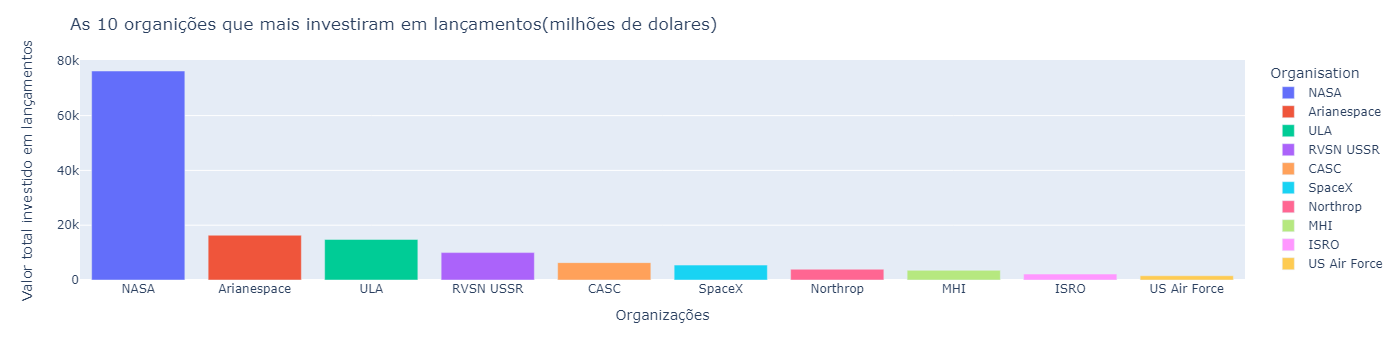

<Figure size 1400x800 with 0 Axes>

In [16]:
plt.figure(figsize=(14,8))
bar = px.bar(top_10_orgs_prices, x="Organisation",y="Price",color="Organisation")
bar.update_layout(title="As 10 organições que mais investiram em lançamentos(milhões de dolares)", yaxis_title="Valor total investido em lançamentos",xaxis_title="Organizações")
bar.show()

# Distribuição de missões
Quantas foram um sucesso?</br>
Quantas foram um fracasso?

In [17]:
mission_status = df_data.groupby("Mission_Status",as_index=False).agg({"Rocket_Status":pd.Series.count})
mission_status.sort_values("Rocket_Status",ascending=False,inplace=True)
mission_status

Mission_Status  Rocket_Status
3            Success           3879
0            Failure            339
1    Partial Failure            102
2  Prelaunch Failure              4

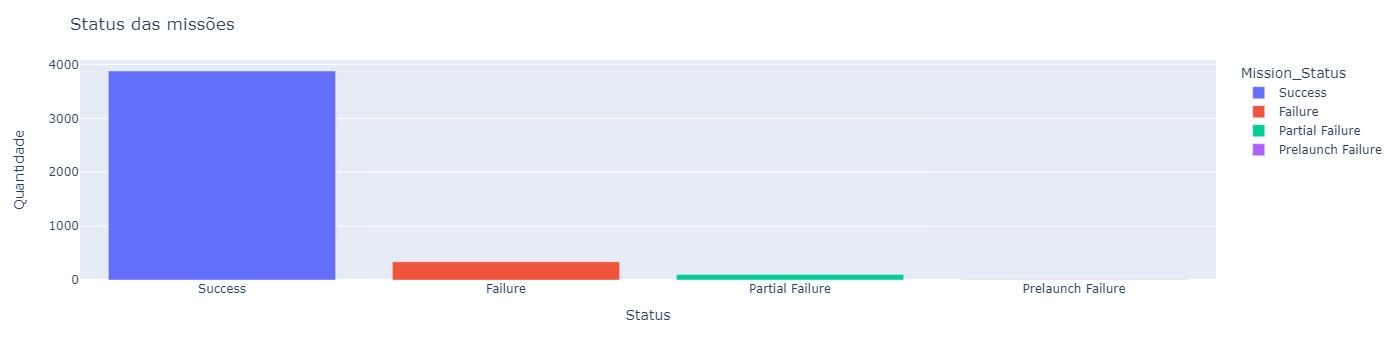

<Figure size 1400x800 with 0 Axes>

In [18]:
plt.figure(figsize=(14,8))
bar = px.bar(mission_status, x="Mission_Status",y="Rocket_Status", color="Mission_Status")
bar.update_layout(title="Status das missões", yaxis_title="Quantidade",xaxis_title="Status")
bar.show()

# Localizações com mais lançamentos

In [19]:
localizacao = df_data.groupby("Location",as_index=False).agg({"Date": pd.Series.count})
localizacao.columns = ["localizacao","lancamentos"]
localizacao.sort_values("lancamentos", ascending=False, inplace=True)
localizacao = localizacao[:10]
localizacao

localizacao  lancamentos
105         Site 31/6, Baikonur Cosmodrome, Kazakhstan          235
91             Site 132/1, Plesetsk Cosmodrome, Russia          216
113             Site 43/4, Plesetsk Cosmodrome, Russia          202
110             Site 41/1, Plesetsk Cosmodrome, Russia          198
85           Site 1/5, Baikonur Cosmodrome, Kazakhstan          193
92             Site 132/2, Plesetsk Cosmodrome, Russia          174
93             Site 133/3, Plesetsk Cosmodrome, Russia          158
112             Site 43/3, Plesetsk Cosmodrome, Russia          138
35          LC-39A, Kennedy Space Center, Florida, USA          120
5    ELA-2, Guiana Space Centre, French Guiana, France          118

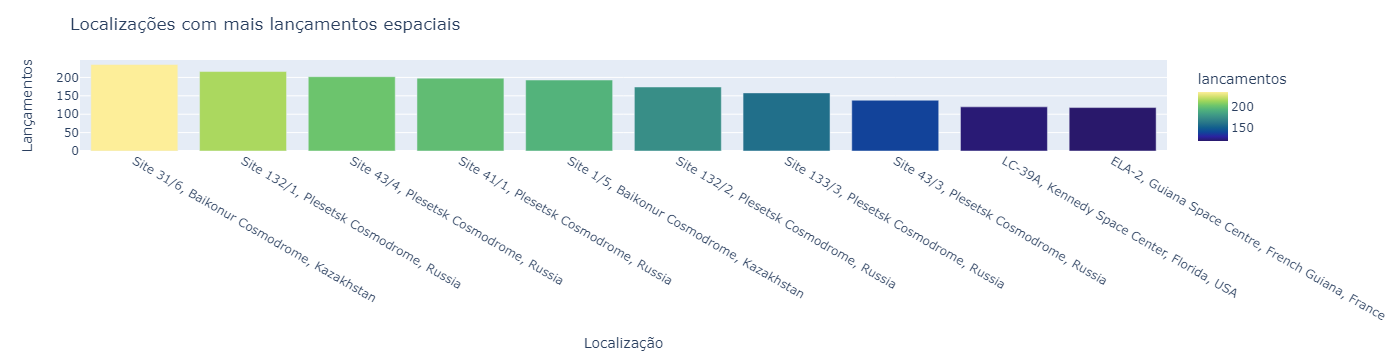

<Figure size 1400x800 with 0 Axes>

In [20]:
plt.figure(figsize=(14,8))
bar = px.bar(localizacao, x="localizacao",y="lancamentos", color="lancamentos",color_continuous_scale=px.colors.sequential.haline)
bar.update_layout(title = "Localizações com mais lançamentos espaciais",xaxis_title="Localização",yaxis_title="Lançamentos")
bar.show()

# Histograma com o valor investido em missões espaciais

In [21]:
df_data.Price.isna().values.sum()

3360

In [22]:
media = df_data.Price.mean()
media

153.7921991701245

In [23]:
df_data.loc[df_data.Price.isna(), "Price"] = media

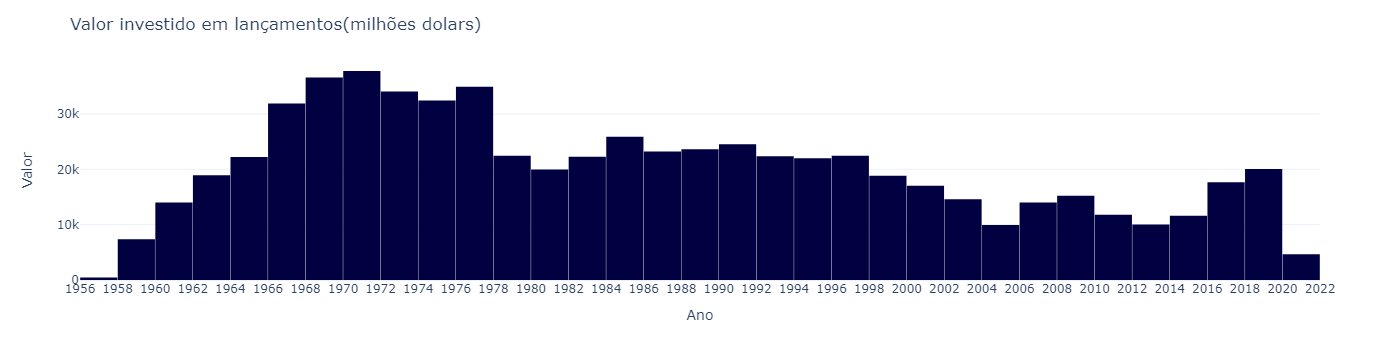

<Figure size 1400x800 with 0 Axes>

In [24]:
plt.figure(figsize=(14,8))
hist = px.histogram(data_frame=df_data, x="Date",y="Price",color_discrete_sequence=['#010040'],template="plotly_white")

hist.update_layout(title = "Valor investido em lançamentos(milhões dolars)", xaxis_title = "Ano", yaxis_title="Valor",bargap=0.01)
hist.update_xaxes(minor_tickmode="auto", nticks=40)
hist.show()

# Análise da Guerra Fria

In [25]:
fim_gf = datetime(1991,12,26)
gf_lancamentos = df_data.copy()
gf_lancamentos = gf_lancamentos.loc[(gf_lancamentos.Date.dt.date<=fim_gf.date())]

In [26]:
usa_filtro = gf_lancamentos["Location"].str.contains("USA")
gf_lancamentos.loc[usa_filtro, "country"] = "USA"

urss_filtro = (gf_lancamentos["Location"].str.contains("Russia")) | (gf_lancamentos["Location"].str.contains("Kazakhstan"))
gf_lancamentos.loc[urss_filtro, "country"] = "URSS"

gf_lancamentos.dropna(inplace=True)
gf_lancamentos

Organisation                                      Location  \
1718         RVSN USSR  Site 175/58, Baikonur Cosmodrome, Kazakhstan   
1719          Yuzhmash        Site 32/2, Plesetsk Cosmodrome, Russia   
1721  General Dynamics     SLC-36B, Cape Canaveral AFS, Florida, USA   
1722  General Dynamics       SLC-3W, Vandenberg AFB, California, USA   
1723         RVSN USSR       Site 133/3, Plesetsk Cosmodrome, Russia   
...                ...                                           ...   
4319           US Navy      LC-18A, Cape Canaveral AFS, Florida, USA   
4320              AMBA      LC-26A, Cape Canaveral AFS, Florida, USA   
4321           US Navy      LC-18A, Cape Canaveral AFS, Florida, USA   
4322         RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323         RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                          Date                                 Detail  \
1718 1991-12-20 00:00:00+00:00         Rokot/Briz K | GVM Demo Flight   
1719 1991-12-18 03:54:00+00:00  Tsyklon-3 | Intercosmos 25 & Magion 3   
1721 1991-12-07 22:47:00+00:00                Atlas II | Eutelsat 2F3   
1722 1991-11-28 13:23:00+00:00     Atlas-E/F Star-37S-ISS | DMSP F-11   
1723 1991-11-27 03:30:00+00:00       Cosmos-3M (11K65M) | Cosmos 2173   
...                        ...                                    ...   
4319 1958-02-05 07:33:00+00:00              Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00+00:00                    Juno I | Explorer 1   
4321 1957-12-06 16:44:00+00:00                Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00+00:00             Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00+00:00             Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status country  
1718  StatusRetired 153.79        Success    URSS  
1719  StatusRetired 153.79        Success    URSS  
1721  StatusRetired 153.79        Success     USA  
1722  StatusRetired 153.79        Success     USA  
1723  StatusRetired 153.79        Success    URSS  
...             ...    ...            ...     ...  
4319  StatusRetired 153.79        Failure     USA  
4320  StatusRetired 153.79        Success     USA  
4321  StatusRetired 153.79        Failure     USA  
4322  StatusRetired 153.79        Success    URSS  
4323  StatusRetired 153.79        Success    URSS  

[2432 rows x 8 columns]

In [27]:
lancamentos_us_urss = gf_lancamentos.groupby(["country"],as_index=False).agg({"Rocket_Status": pd.Series.count})
lancamentos_us_urss.columns = ["Organizacao","Lancamentos"]
lancamentos_us_urss

Organizacao  Lancamentos
0        URSS         1770
1         USA          662

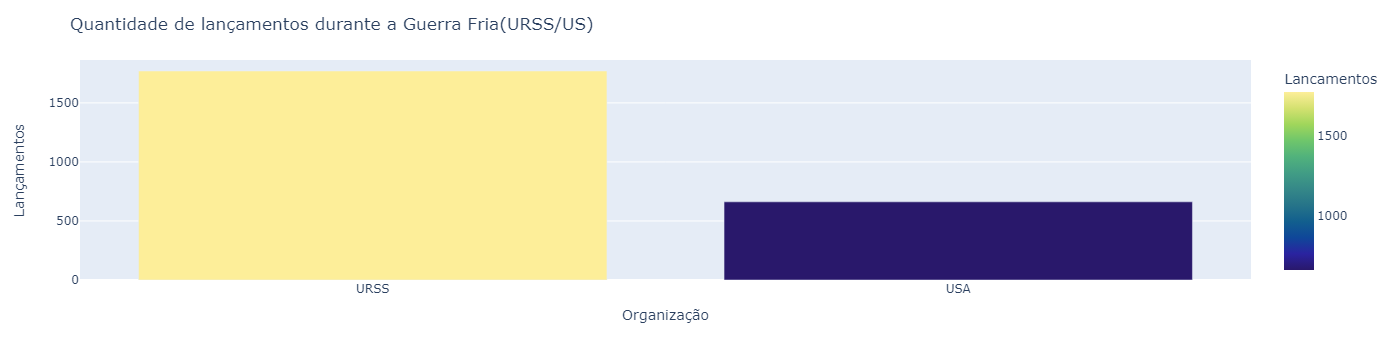

<Figure size 1400x800 with 0 Axes>

In [28]:
plt.figure(figsize=(14,8))
bar = px.bar(lancamentos_us_urss, x="Organizacao",y="Lancamentos",color="Lancamentos",color_continuous_scale=px.colors.sequential.haline)
bar.update_layout(title = "Quantidade de lançamentos durante a Guerra Fria(URSS/US)",xaxis_title="Organização",yaxis_title="Lançamentos")
bar.show()

In [29]:
usa = gf_lancamentos["country"] == "USA"
# print(usa)
ano_ano_usa = gf_lancamentos.groupby([gf_lancamentos.country[usa],gf_lancamentos.Date.dt.year]).agg({"Price":pd.Series.count})
ano_ano_usa.reset_index(level="country",inplace=True)
ano_ano_usa

country  Price
Date               
1957     USA      1
1958     USA     23
1959     USA     16
1960     USA     30
1961     USA     43
1962     USA     60
1963     USA     17
1964     USA     24
1965     USA     33
1966     USA     47
1967     USA     26
1968     USA     22
1969     USA     17
1970     USA     11
1971     USA     16
1972     USA     17
1973     USA     17
1974     USA     10
1975     USA     15
1976     USA     13
1977     USA     14
1978     USA     21
1979     USA      9
1980     USA     11
1981     USA     13
1982     USA     11
1983     USA     13
1984     USA     17
1985     USA     16
1986     USA      6
1987     USA      6
1988     USA      7
1989     USA     16
1990     USA     26
1991     USA     18

In [30]:
urss = gf_lancamentos["country"] == "URSS"
# print(usa)
ano_ano_urss = gf_lancamentos.groupby([gf_lancamentos.country[urss],gf_lancamentos.Date.dt.year]).agg({"Price":pd.Series.count})
ano_ano_urss.reset_index(level="country",inplace=True)
ano_ano_urss

country  Price
Date               
1957    URSS      2
1958    URSS      5
1959    URSS      4
1960    URSS      9
1961    URSS      9
1962    URSS     22
1963    URSS     24
1964    URSS     36
1965    URSS     53
1966    URSS     51
1967    URSS     75
1968    URSS     80
1969    URSS     83
1970    URSS     88
1971    URSS     93
1972    URSS     79
1973    URSS     84
1974    URSS     83
1975    URSS     89
1976    URSS     95
1977    URSS     97
1978    URSS     71
1979    URSS     36
1980    URSS     40
1981    URSS     51
1982    URSS     53
1983    URSS     46
1984    URSS     42
1985    URSS     51
1986    URSS     49
1987    URSS     42
1988    URSS     36
1989    URSS     26
1990    URSS     37
1991    URSS     29

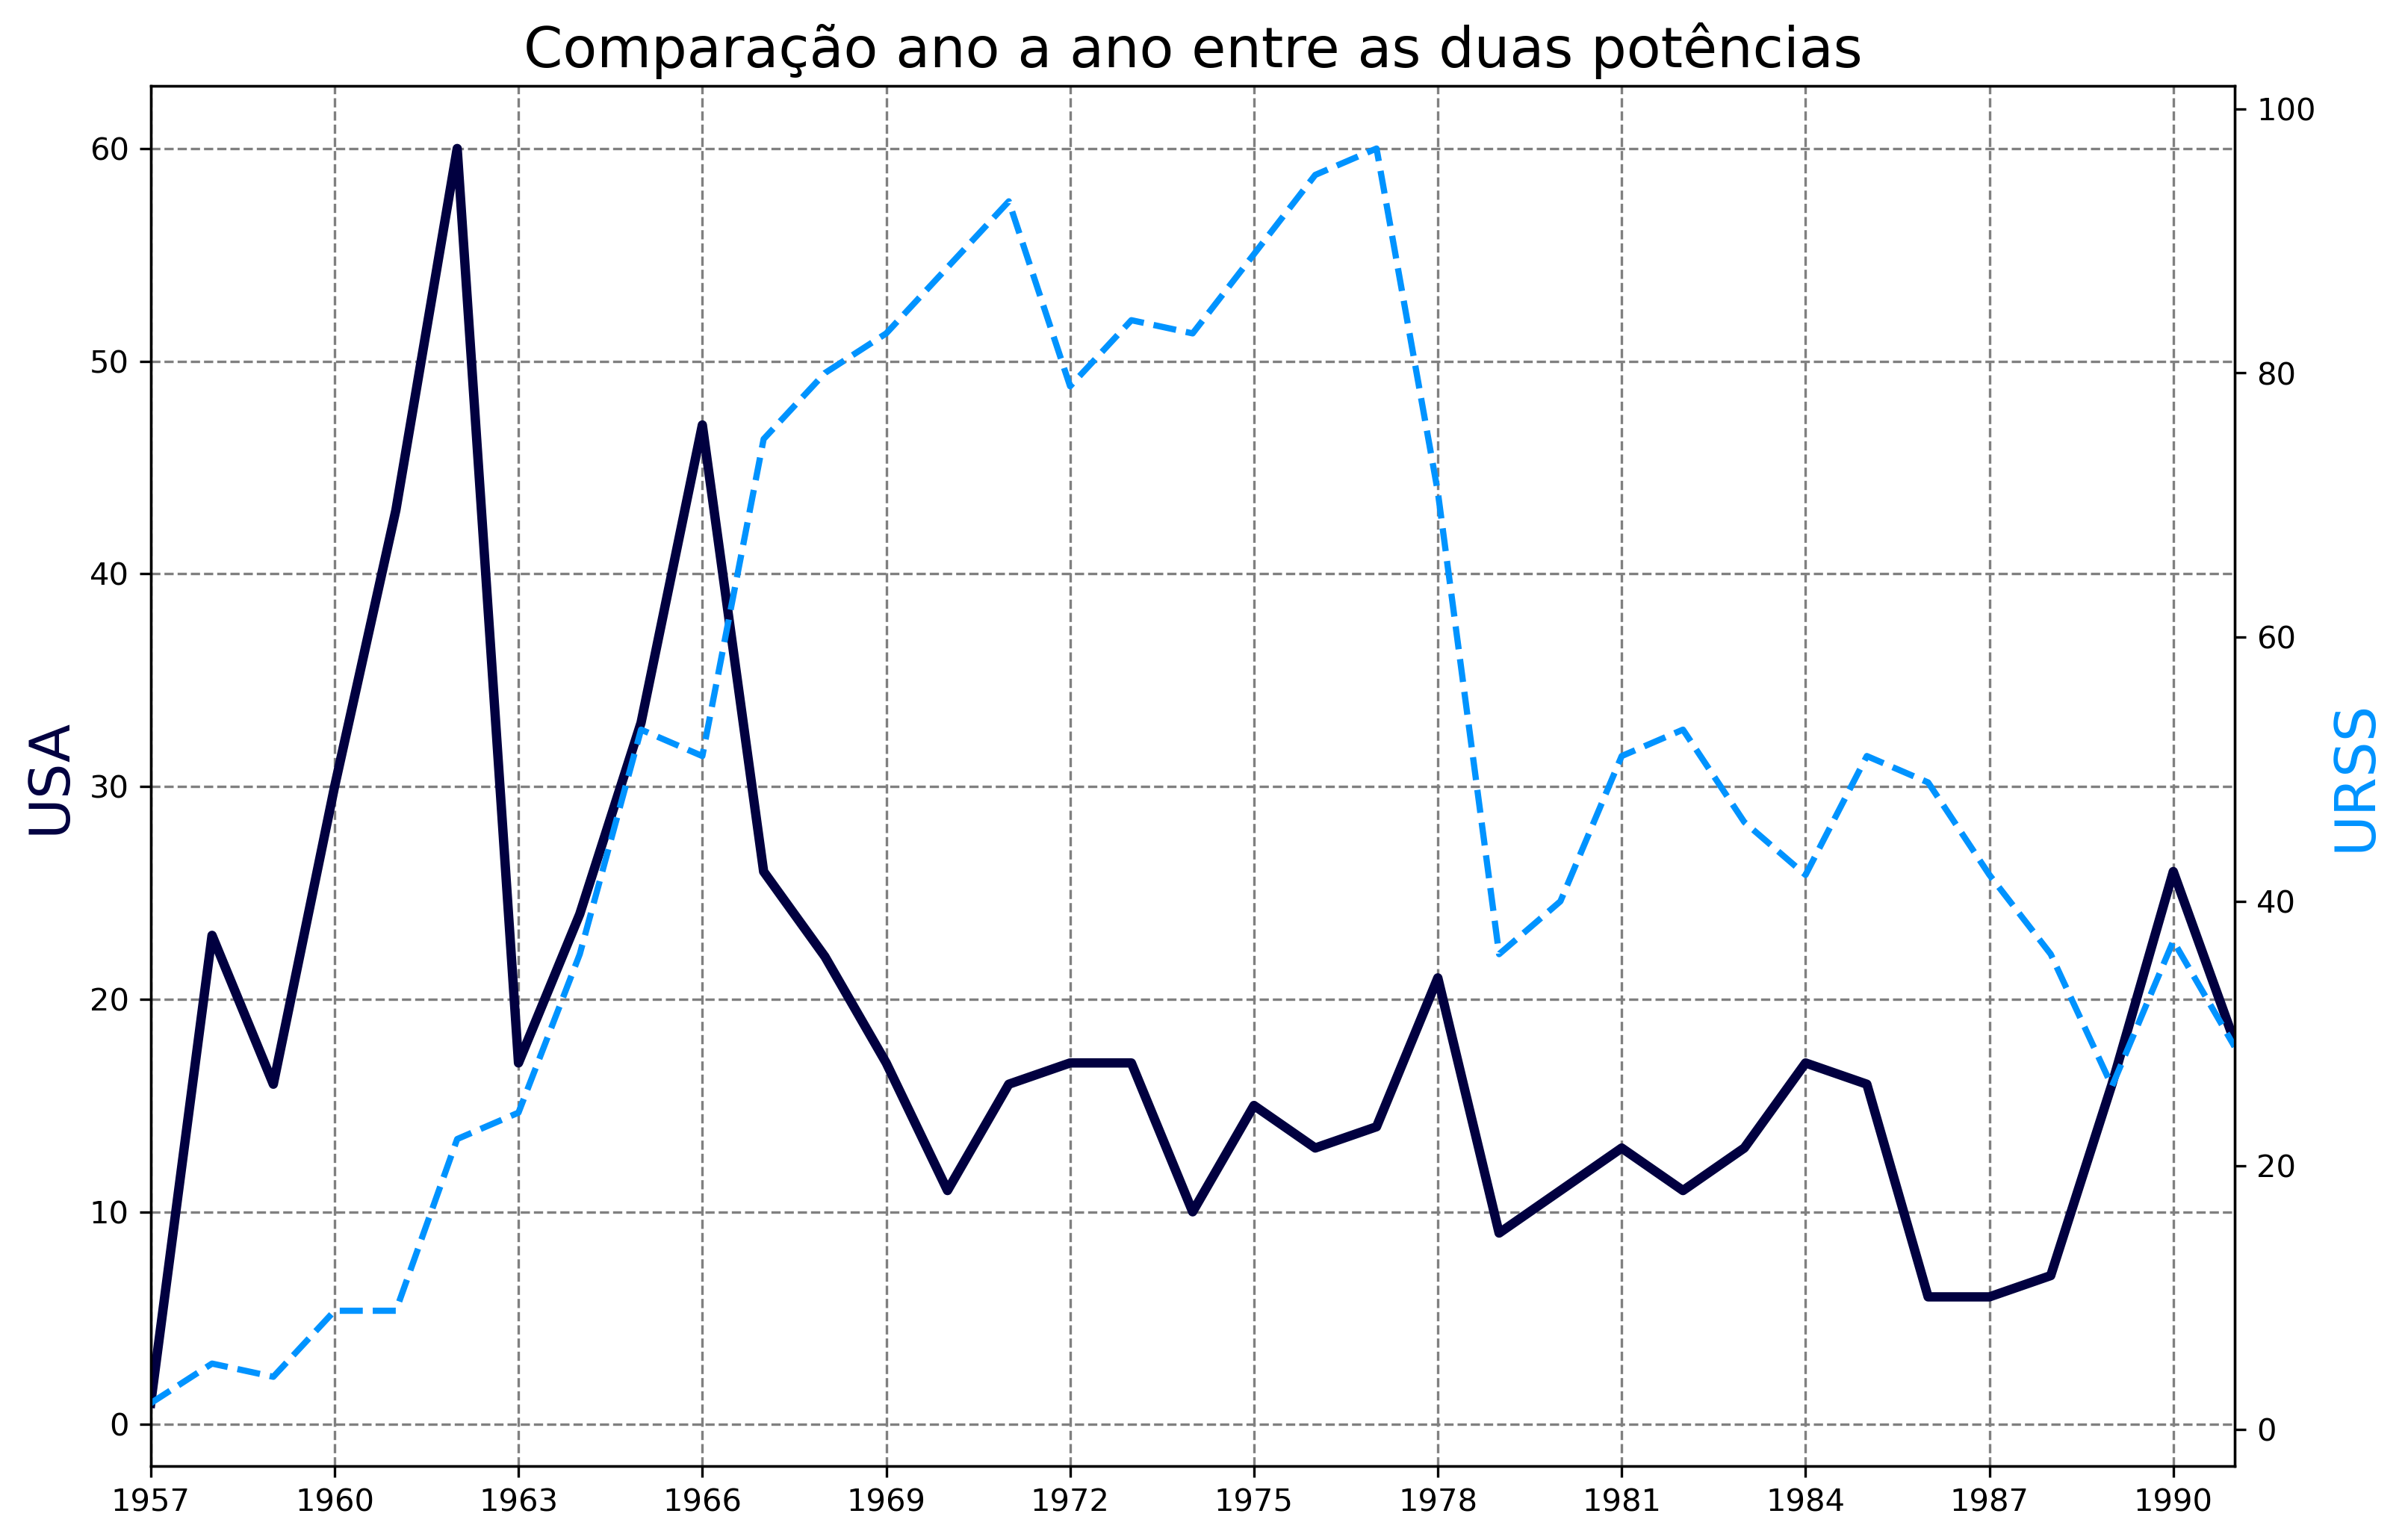

In [31]:
plt.figure(figsize=(12,8), dpi=300)
plt.title("Comparação ano a ano entre as duas potências", fontsize=18)
ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.set_ylabel("USA", color="#010040", fontsize=18)
ax2.set_ylabel("URSS", color="#0093ff", fontsize=18)
ax1.grid(linestyle="--",color="grey")

ax1.plot(ano_ano_usa.index, ano_ano_usa.Price, color="#010040",linewidth=3)
ax2.plot(ano_ano_usa.index, ano_ano_urss.Price, color="#0093ff",linewidth=2,linestyle="dashed")
ax1.set_xlim([ano_ano_usa.index.min(), ano_ano_usa.index.max()])
plt.xticks(ticks=np.arange(ano_ano_usa.index.min(), ano_ano_usa.index.max(), step=3))

plt.show()

# Relação de lançamentos por ano e gastos gastos

In [32]:
lancamentos_anual = df_data.groupby([df_data.Date.dt.year]).agg({"Price":pd.Series.count})
lancamentos_anual

Price
Date       
1957      3
1958     28
1959     20
1960     39
1961     52
...     ...
2016     90
2017     92
2018    117
2019    109
2020     63

[64 rows x 1 columns]

In [33]:
gastos_anual = df_data.groupby([df_data.Date.dt.year]).agg({"Price":pd.Series.sum})


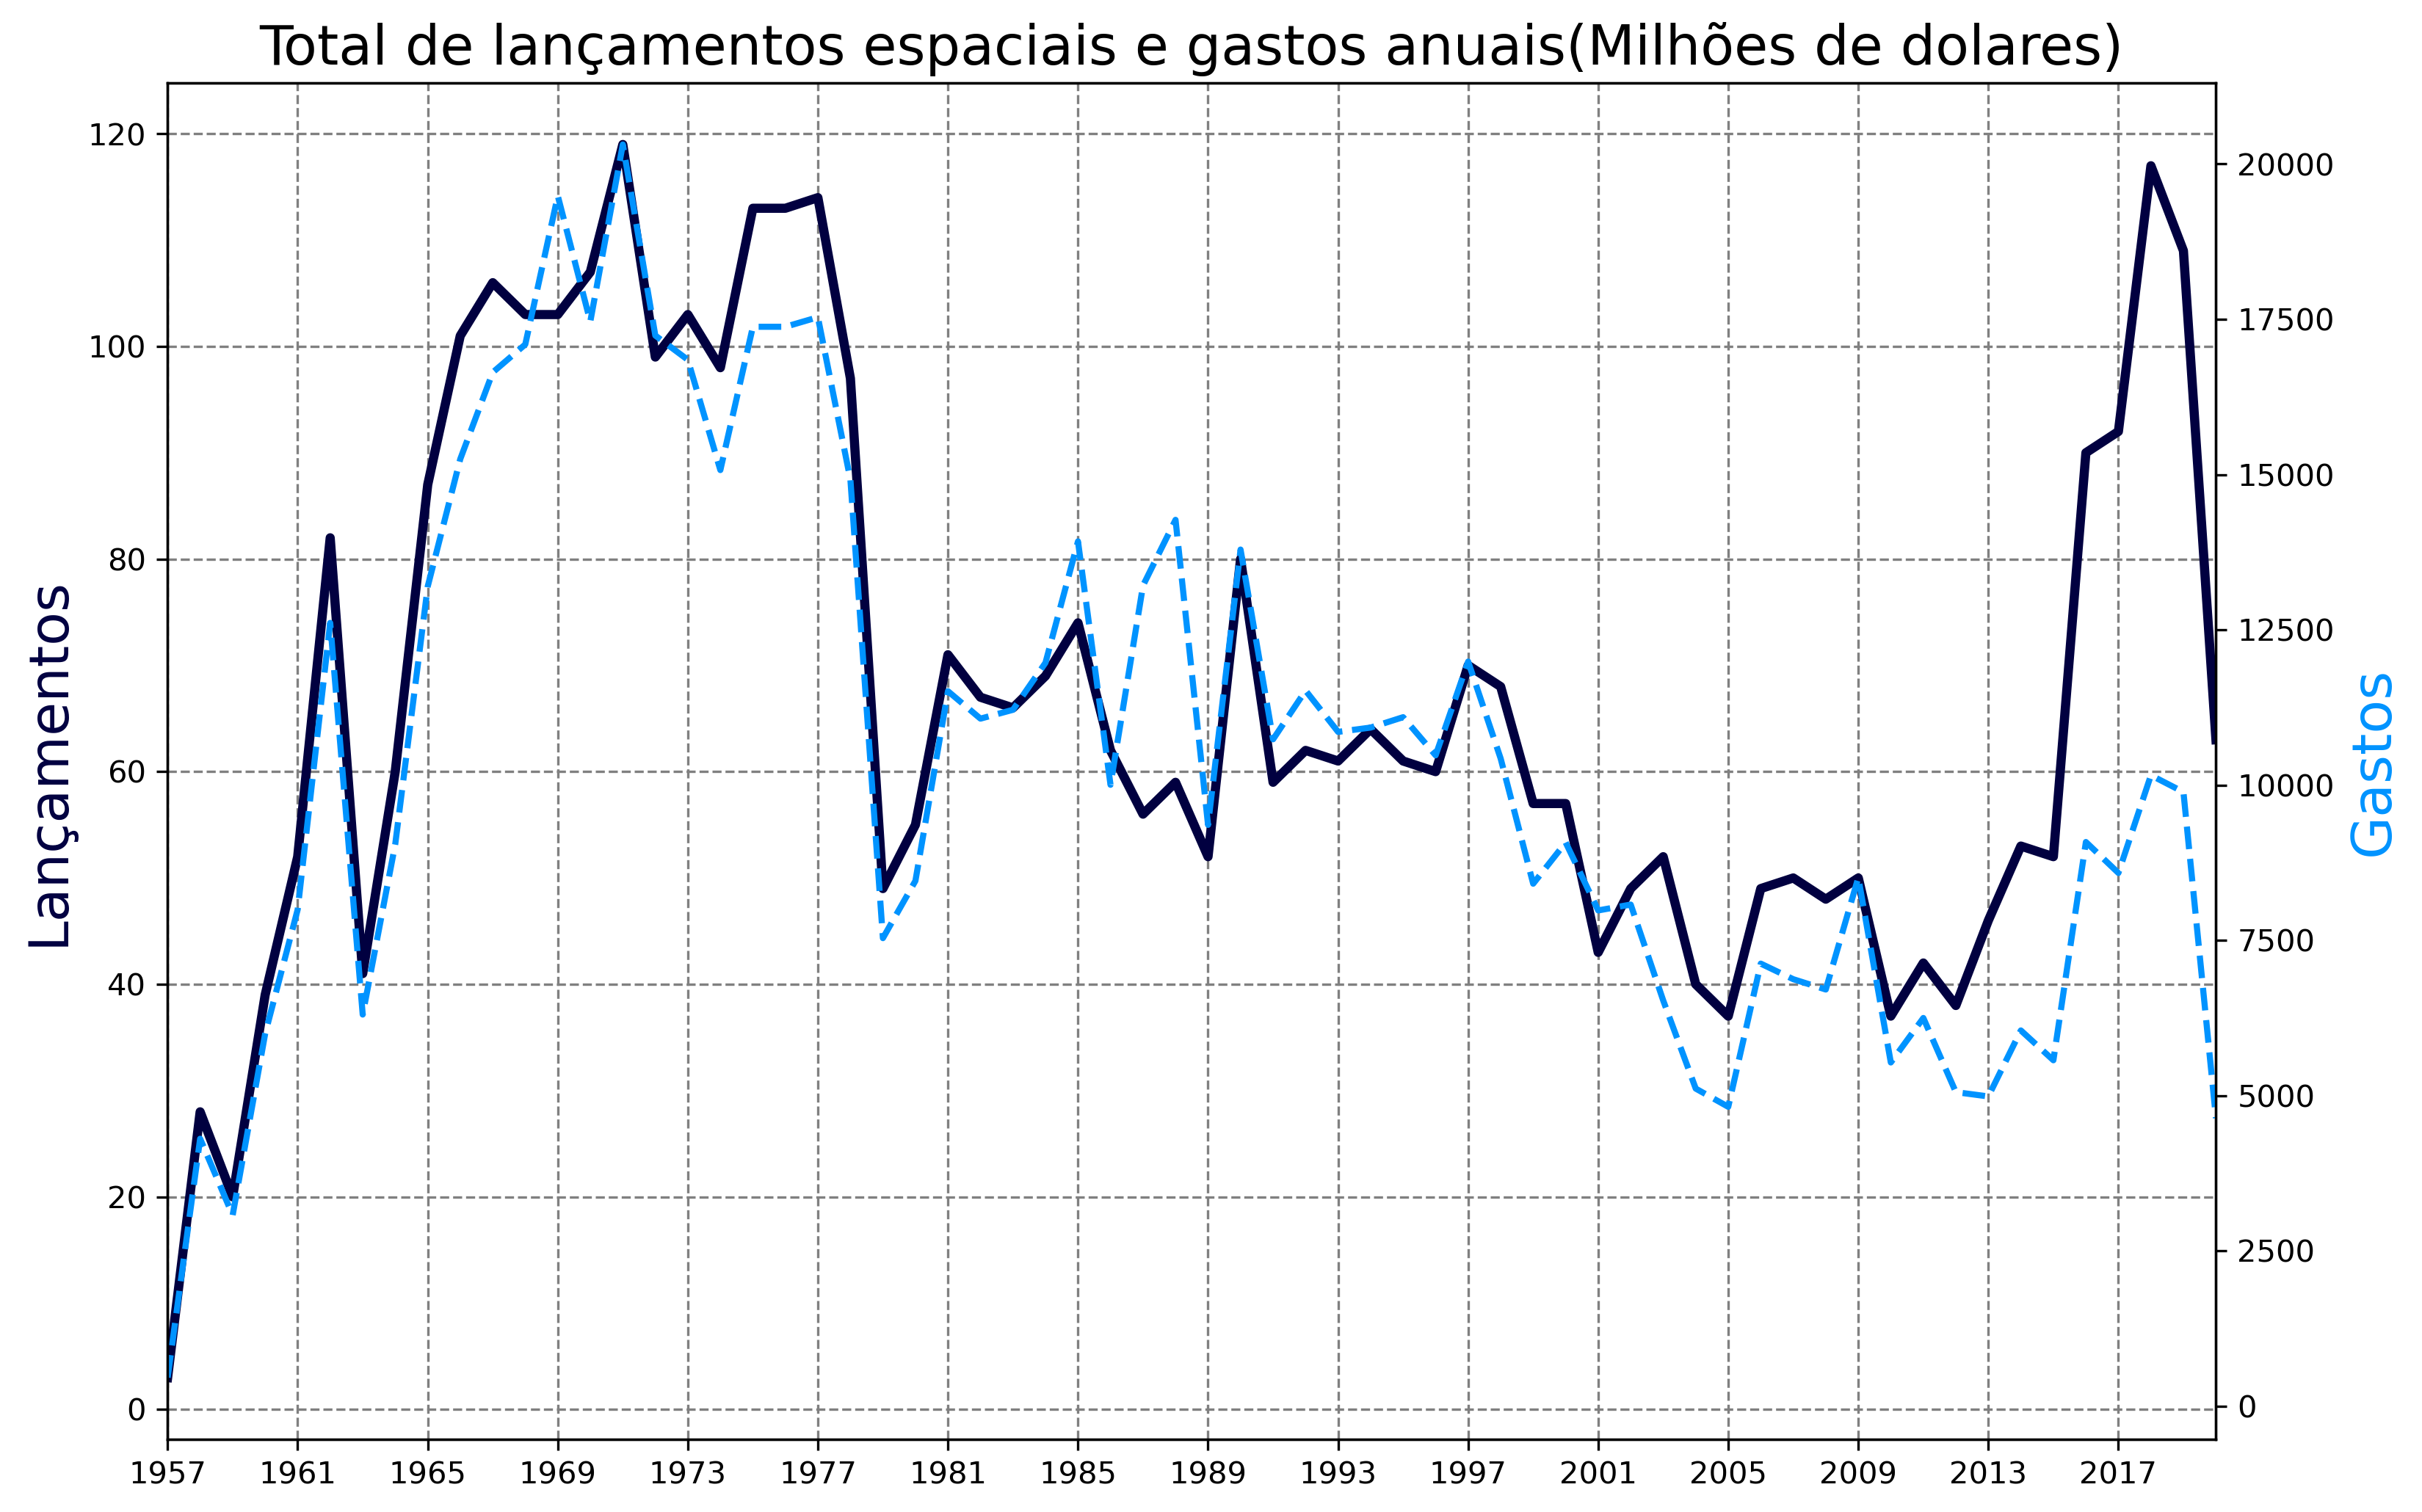

In [34]:
plt.figure(figsize=(12,8), dpi=300)
plt.title("Total de lançamentos espaciais e gastos anuais(Milhões de dolares)", fontsize=18)
ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.set_ylabel("Lançamentos", color="#010040", fontsize=18)
ax2.set_ylabel("Gastos", color="#0093ff", fontsize=18)
ax1.grid(linestyle="--",color="grey")

ax1.plot(gastos_anual.index, lancamentos_anual.Price, color="#010040",linewidth=3)
ax2.plot(gastos_anual.index, gastos_anual.Price, color="#0093ff",linewidth=2,linestyle="dashed")
ax1.set_xlim([gastos_anual.index.min(), gastos_anual.index.max()])
plt.xticks(ticks=np.arange(gastos_anual.index.min(), gastos_anual.index.max(), step=4))

plt.show()

# Valor gasto em lançamentos pela SpaceX

In [35]:
spacex = df_data.loc[df_data["Organisation"] == "SpaceX"]
anual_spacex = spacex.groupby([df_data.Date.dt.year]).agg({"Price":pd.Series.sum})
anual_spacex

Price
Date         
2006     7.00
2007     7.00
2008    14.00
2009     7.00
2010   119.00
2012   119.00
2013   172.50
2014   339.00
2015   401.00
2016   552.50
2017 1,116.00
2018 1,210.00
2019   730.00
2020   803.79

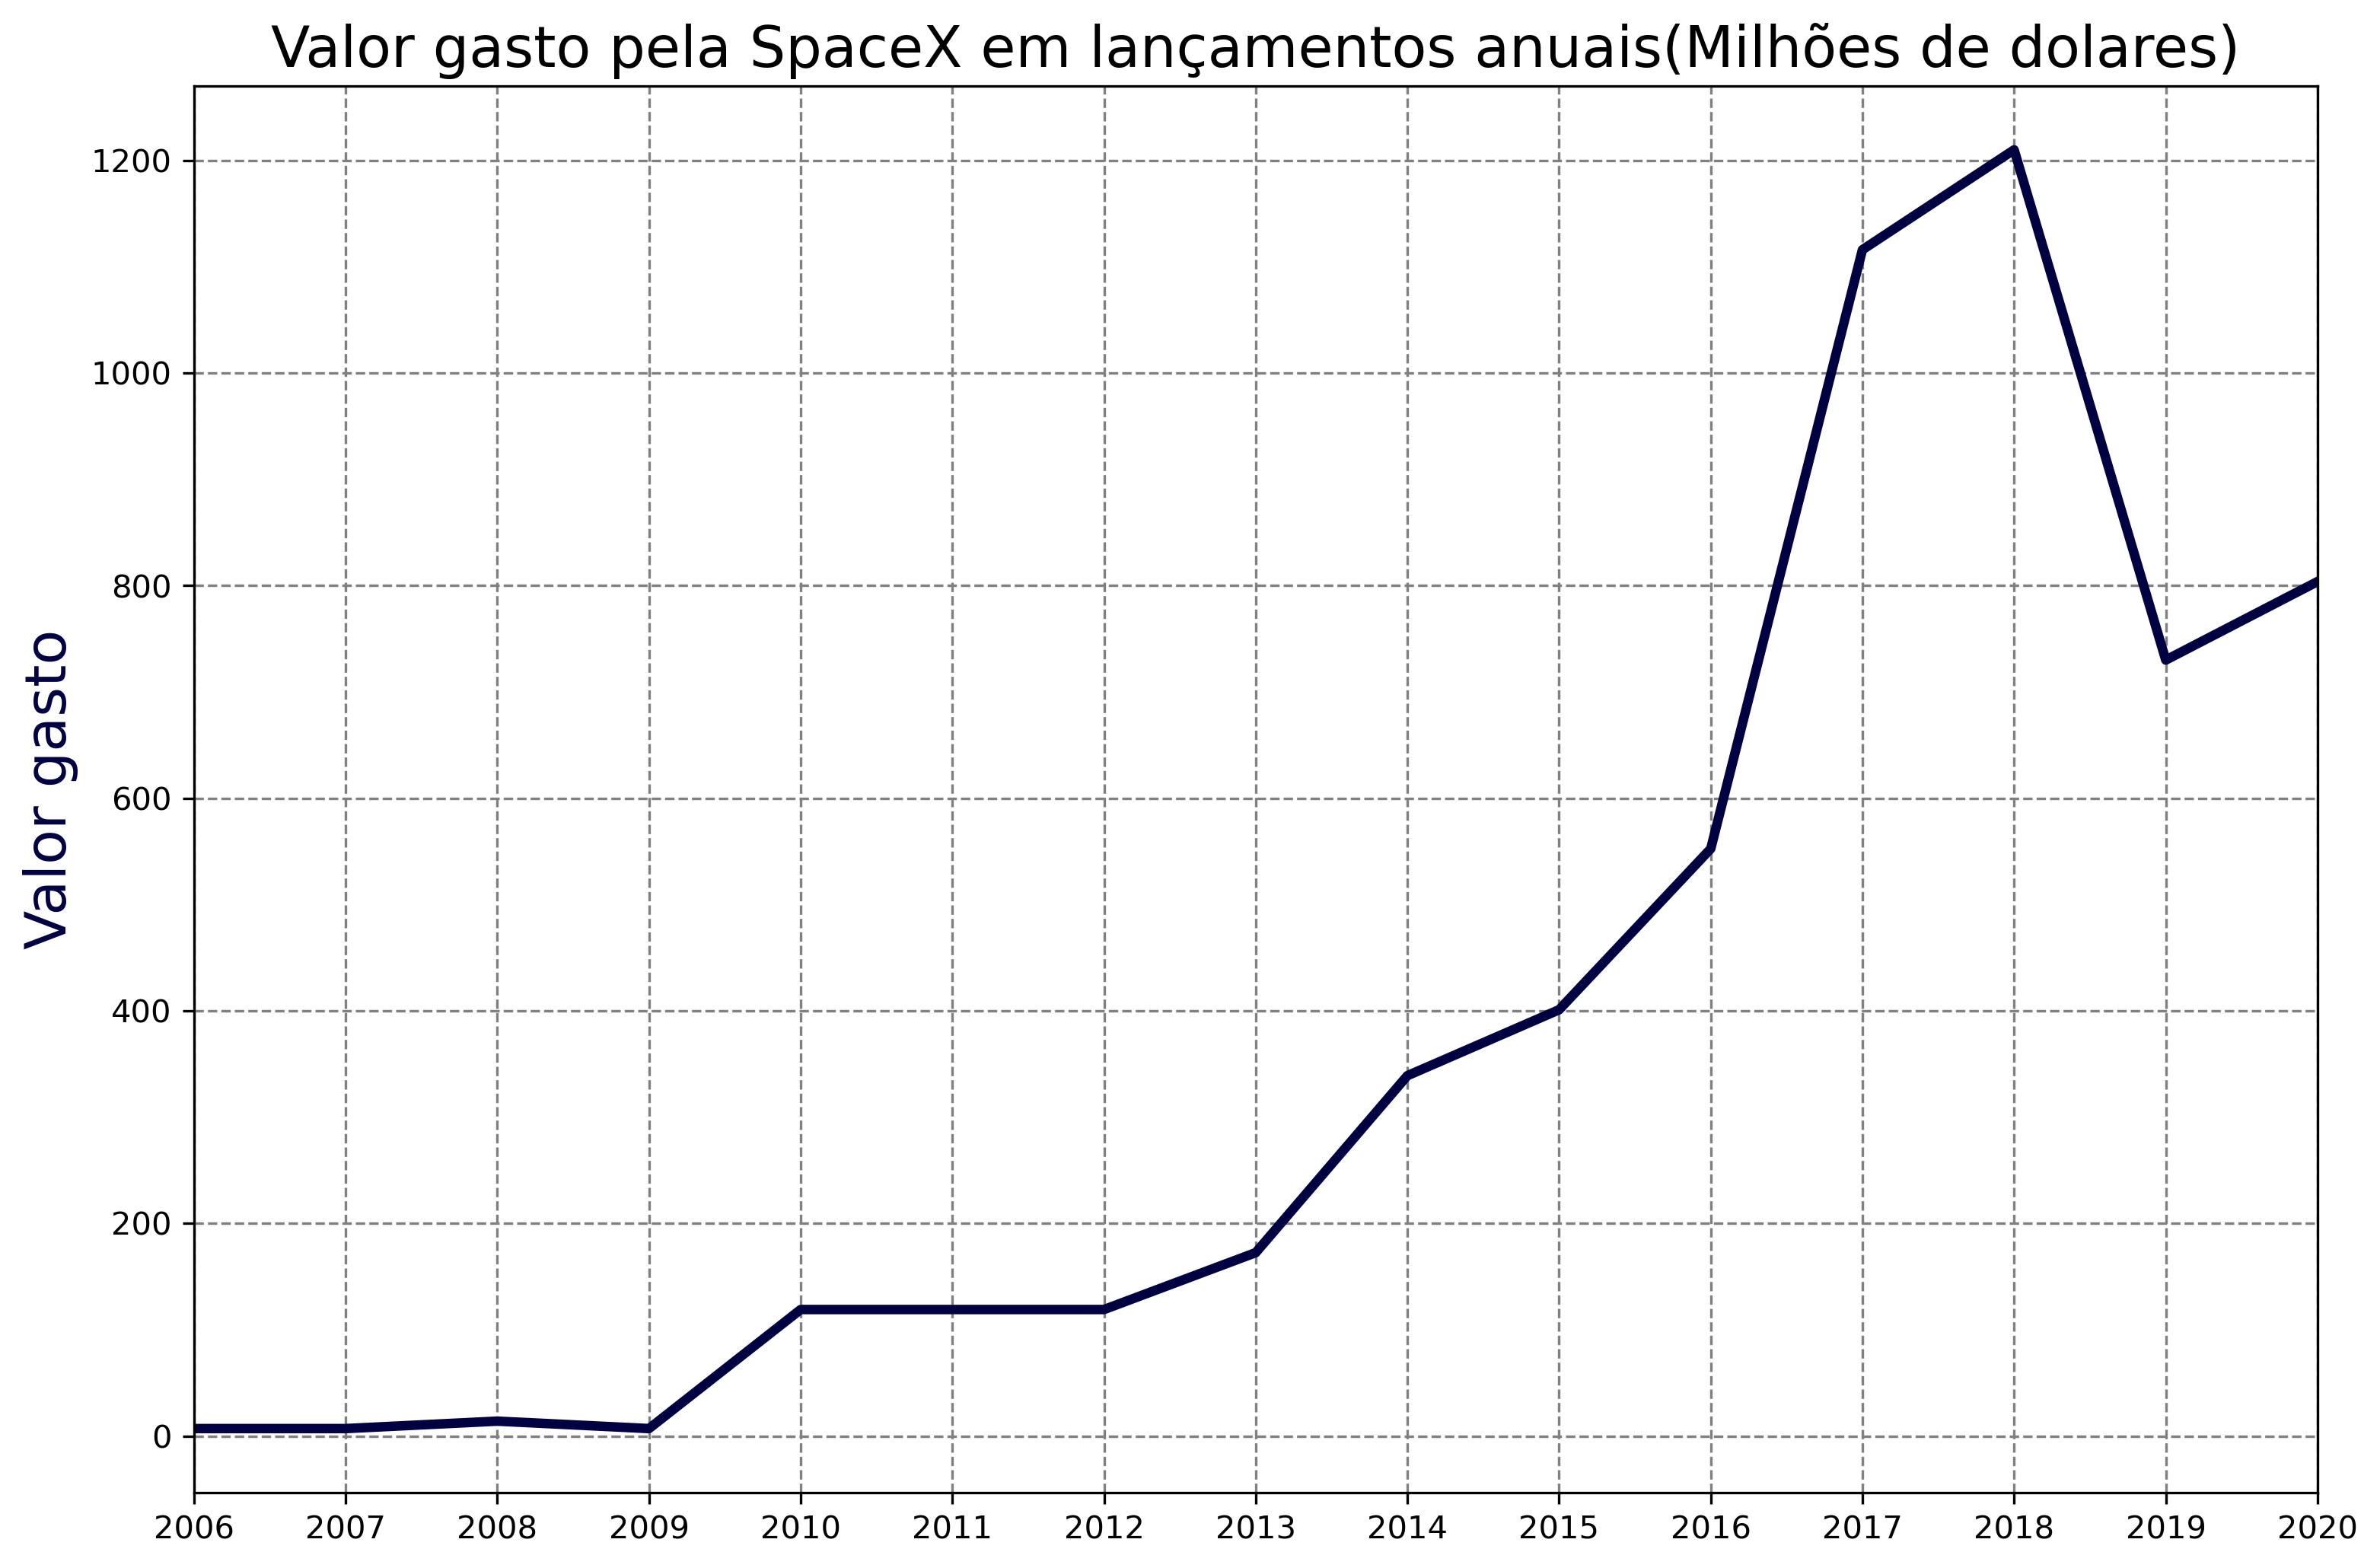

In [36]:
plt.figure(figsize=(12,8), dpi=300)
plt.title("Valor gasto pela SpaceX em lançamentos anuais(Milhões de dolares)", fontsize=18)
ax = plt.gca()



ax.set_ylabel("Valor gasto", color="#010040", fontsize=18)
ax.grid(linestyle="--",color="grey")

ax.plot(anual_spacex.index, anual_spacex.Price, color="#010040",linewidth=3)
ax.set_xlim([anual_spacex.index.min(), anual_spacex.index.max()])
plt.xticks(ticks=np.arange(anual_spacex.index.min(), anual_spacex.index.max()+1, step=1))

plt.show()